In [9]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
df = pd.read_csv("caar.csv")

In [31]:
df.head(15)

,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
0,1,Toyota,2000,2.6,Petrol,Automatic,269013,Like New,35653.47,Corolla
1,2,Mercedes,2000,1.0,Diesel,Manual,149333,Like New,98190.42,E-Class
2,3,Toyota,2000,4.2,Hybrid,Automatic,184681,Used,37912.87,Camry
3,4,Audi,2000,3.2,Electric,Manual,137046,Like New,96270.31,Q7
4,5,BMW,2000,3.1,Hybrid,Manual,296753,Used,64720.38,3 Series
5,6,BMW,2000,1.1,Petrol,Manual,9404,Used,19504.91,X5
6,7,Ford,2000,5.9,Electric,Automatic,145711,Like New,59161.45,Fiesta
7,8,Audi,2000,4.4,Diesel,Manual,144535,Used,77050.35,A3
8,9,Mercedes,2000,3.3,Hybrid,Manual,27268,New,6493.08,GLA
9,10,Toyota,2000,4.3,Hybrid,Automatic,10204,New,71574.06,Prius


In [32]:
df.shape

(2500, 10)

In [33]:
df.isnull().sum()

Car ID          0
Brand           0
Year            0
Engine Size     0
Fuel Type       0
Transmission    0
Mileage         0
Condition       0
Price           0
Model           0
dtype: int64

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Car ID        2500 non-null   int64  
 1   Brand         2500 non-null   object 
 2   Year          2500 non-null   int64  
 3   Engine Size   2500 non-null   float64
 4   Fuel Type     2500 non-null   object 
 5   Transmission  2500 non-null   object 
 6   Mileage       2500 non-null   int64  
 7   Condition     2500 non-null   object 
 8   Price         2500 non-null   float64
 9   Model         2500 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 195.4+ KB


In [35]:



# sort all rows by Year
df = df.sort_values('Year').reset_index(drop=True)

# re-number Car ID from 1 to 2500
df['Car ID'] = range(1, len(df) + 1)

# save new file
df.to_csv('caar_sorted.csv', index=False)

# check result
print(df[['Car ID', 'Brand', 'Year', 'Price']].head(10))

   Car ID   Brand  Year     Price
0       1  Toyota  2000  35653.47
1       2    Audi  2000  85719.15
2       3    Audi  2000  32454.14
3       4   Honda  2000  65977.95
4       5    Audi  2000  74765.48
5       6   Honda  2000  12104.41
6       7    Audi  2000  38681.70
7       8     BMW  2000  40673.26
8       9   Tesla  2000   7690.81
9      10     BMW  2000  35091.12


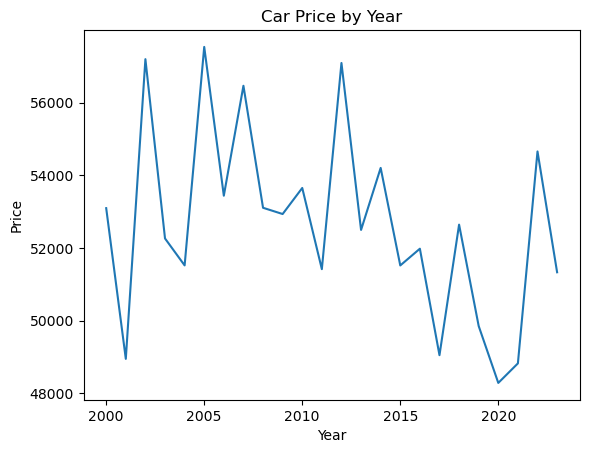

In [36]:

avg_price = df.groupby('Year')['Price'].mean()

plt.plot(avg_price.index, avg_price.values)
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Car Price by Year')
plt.show()

In [38]:

df['Brand'].nunique()
df['Brand'].unique()

array(['Toyota', 'Audi', 'Honda', 'BMW', 'Tesla', 'Ford', 'Mercedes'],
      dtype=object)

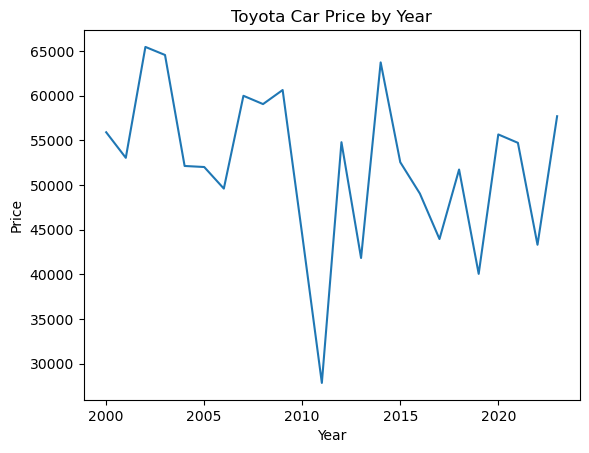

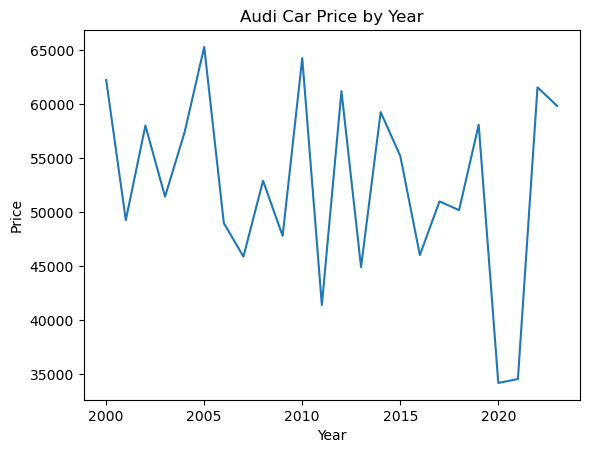

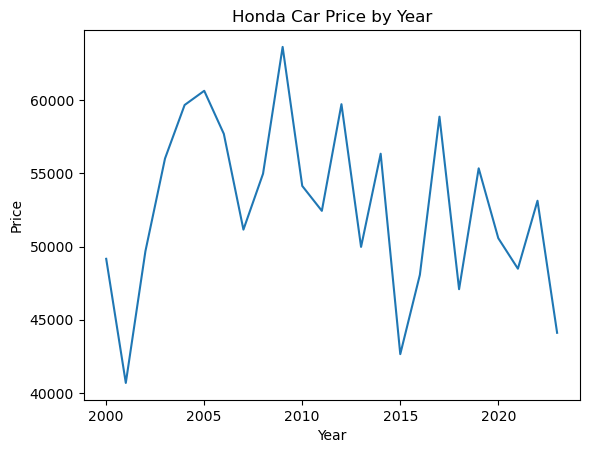

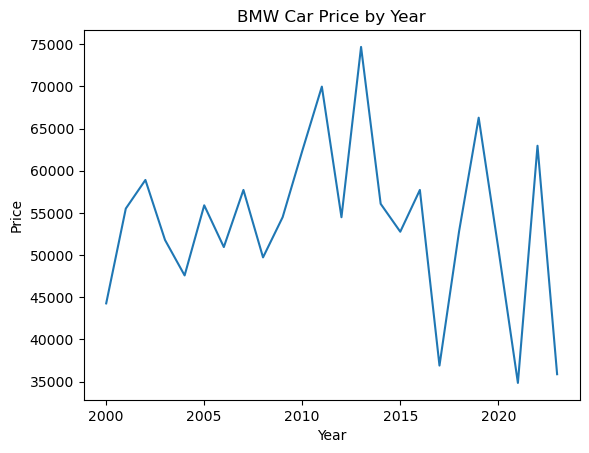

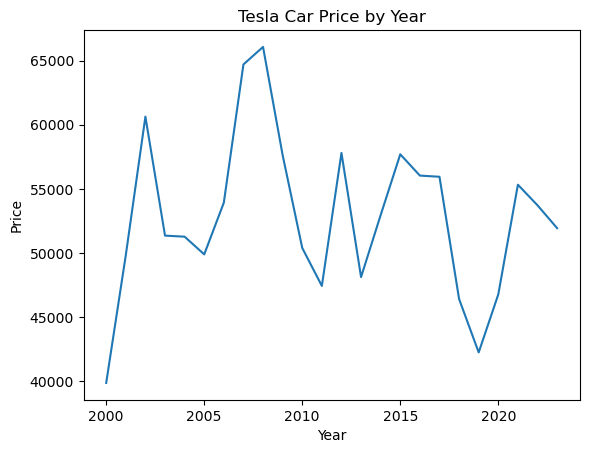

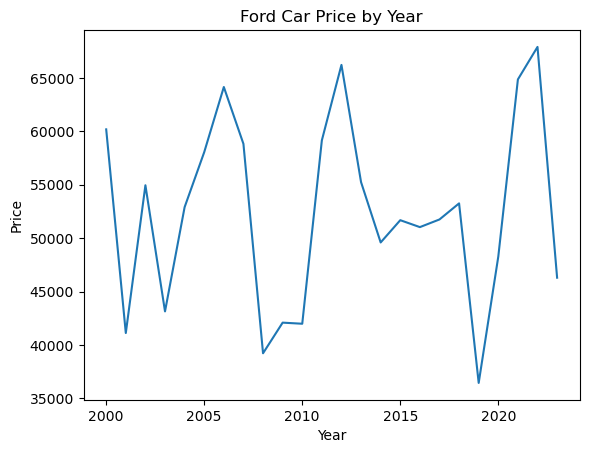

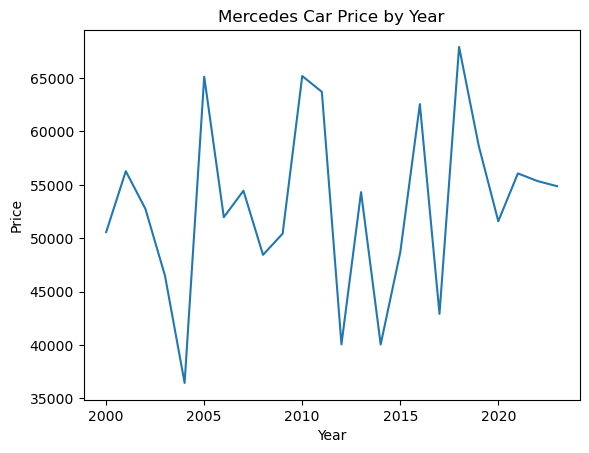

In [41]:

brands = df['Brand'].unique()

for brand in brands:
    brand_df = df[df['Brand'] == brand]
    avg_price = brand_df.groupby('Year')['Price'].mean()
    
    plt.figure()
    plt.plot(avg_price.index, avg_price.values)
    plt.xlabel('Year')
    plt.ylabel('Price')
    plt.title(f'{brand} Car Price by Year')
    plt.show()

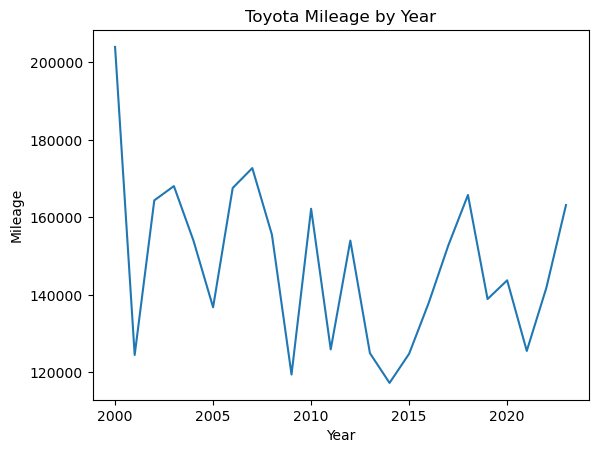

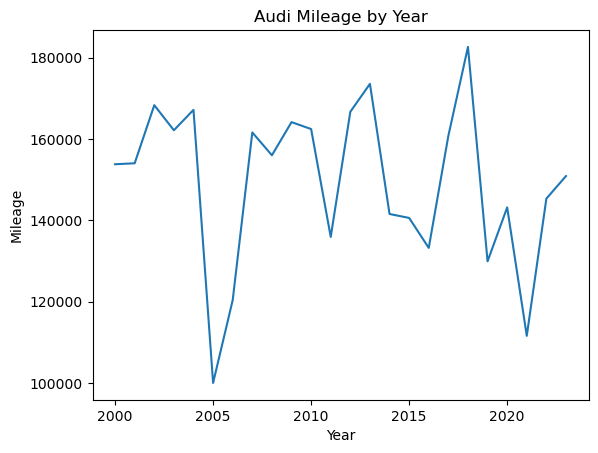

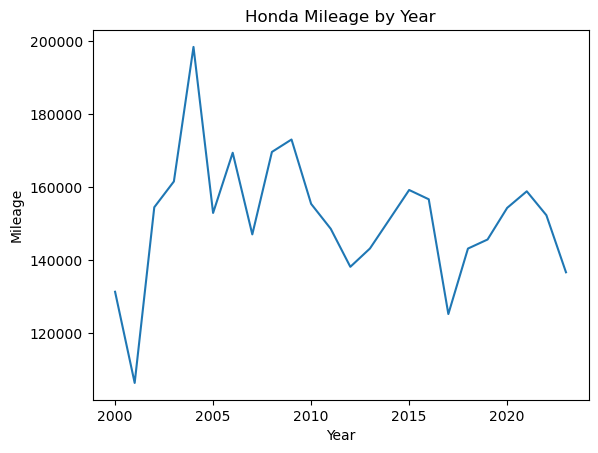

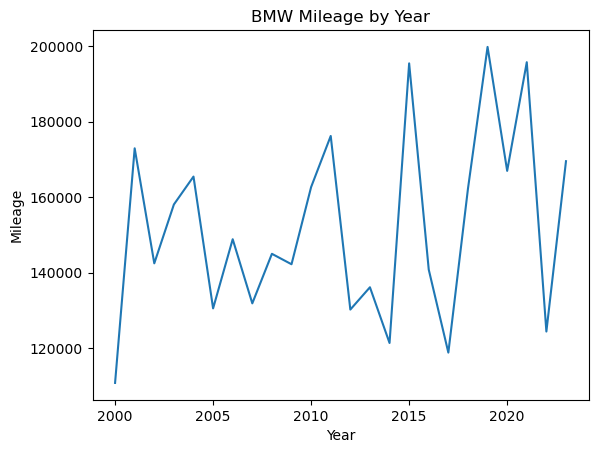

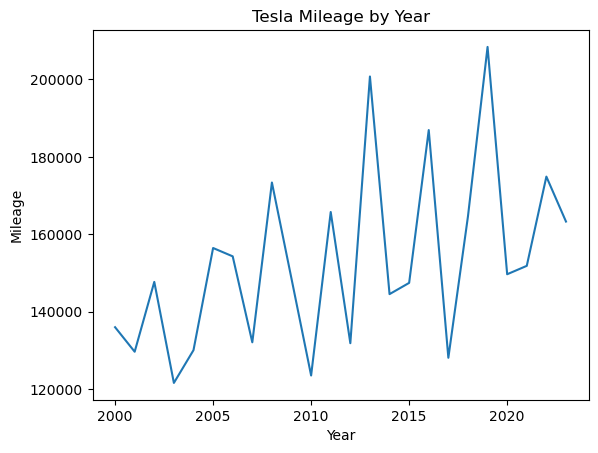

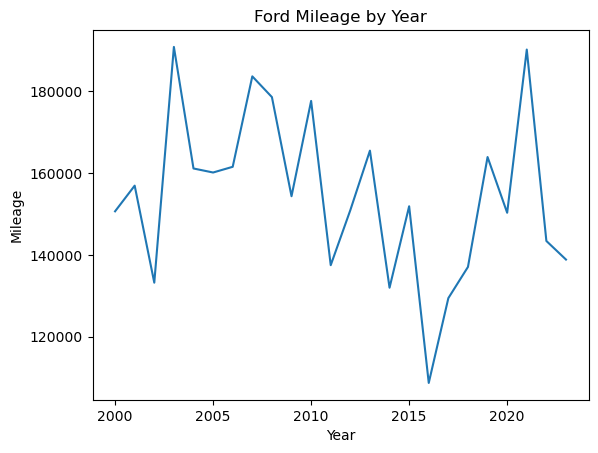

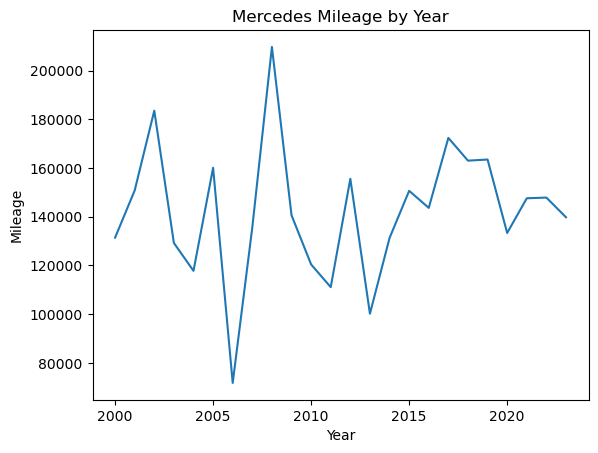

In [42]:

brands = df['Brand'].unique()

for brand in brands:
    brand_df = df[df['Brand'] == brand]
    avg_mileage = brand_df.groupby('Year')['Mileage'].mean()
    
    plt.figure()
    plt.plot(avg_mileage.index, avg_mileage.values)
    plt.xlabel('Year')
    plt.ylabel('Mileage')
    plt.title(f'{brand} Mileage by Year')
    plt.show()